In [1]:
import numpy as np
from numpy import mean
from numpy import exp
from numpy import inf
from scipy.integrate import quad
import matplotlib.pyplot as plt

In [2]:
# Randomly Sampling Using NumPy
# Generate random numbers from a Gaussian distribution
mean = 0
std_dev = 1
n = 1000
samples = np.random.normal(mean, std_dev, n)
samples[0:10]

array([ 0.91229564,  0.9141575 ,  0.82447471, -1.50117561,  0.54671696,
       -1.02628737, -0.15828051,  0.38799421,  1.06266512, -1.84758496])

In [3]:
mu_hat = (1/n) * np.sum(samples)
sigma_hat = np.sqrt((1/(n-1)) * np.sum((samples - mu_hat)**2))
print(f'mu_hat= {mu_hat}, and sigma_hat= {sigma_hat}')

mu_hat= -0.02248470872667877, and sigma_hat= 0.9683711893602435


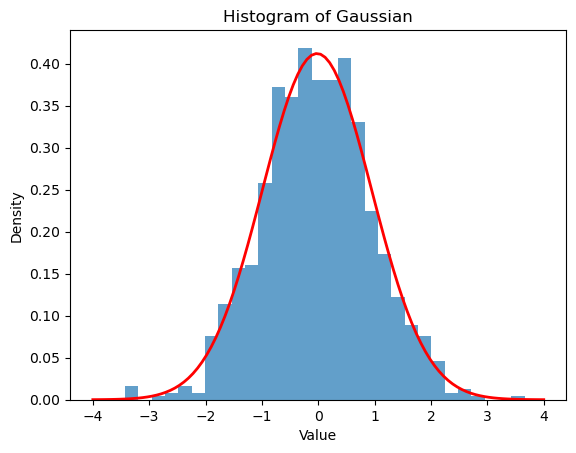

In [4]:

def norm_pdf(x, mu, sigma):
    return 1/np.sqrt(2*np.pi*(sigma**2)) * np.exp(- (x - mu)**2 / (2*(sigma**2)))

plt.hist(samples, bins=30, density=True, alpha=.7)
x = np.linspace(-4, 4, 100)
y = norm_pdf(x, mu_hat, sigma_hat)
plt.plot(x, y, color='red', linewidth=2)

plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Histogram of Gaussian')
plt.show()

In [5]:
# Other Common Distributions to Try
# Exponential
# samples = np.random.exponential(scale=1/lambda, size=1000)
# Categorical
# samples = np.random.choice(category_range, n, p=probabilities)
# Uniform
# samples = np.random.rand(a, b)
# Poisson
# samples = np.random.poisson(lambda, size=1000)

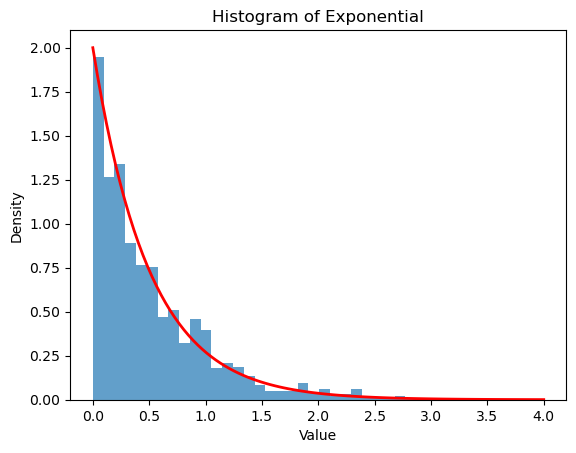

In [6]:
# Inversion Sampling (example with exponential)
def expon_pdf(x, lam):
    return lam * np.exp(-lam * x)

def inv_CDF(y, lam):
    return -np.log(1 - y) / lam

# Let's say we want to sample from an Exponential with Lambda =2
# First generate 1000 uniform samples
n = 1000
y_samples = np.random.uniform(0, 1, n)

# Use the inverse CDF to convert them to exponential
x_samples = inv_CDF(y_samples, lam = 2)

plt.hist(x_samples, bins=30, density=True, alpha=.7)
x = np.linspace(0, 4, 100)
y = expon_pdf(x, lam = 2)
plt.plot(x, y, color='red', linewidth=2)

plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Histogram of Exponential')

plt.show()

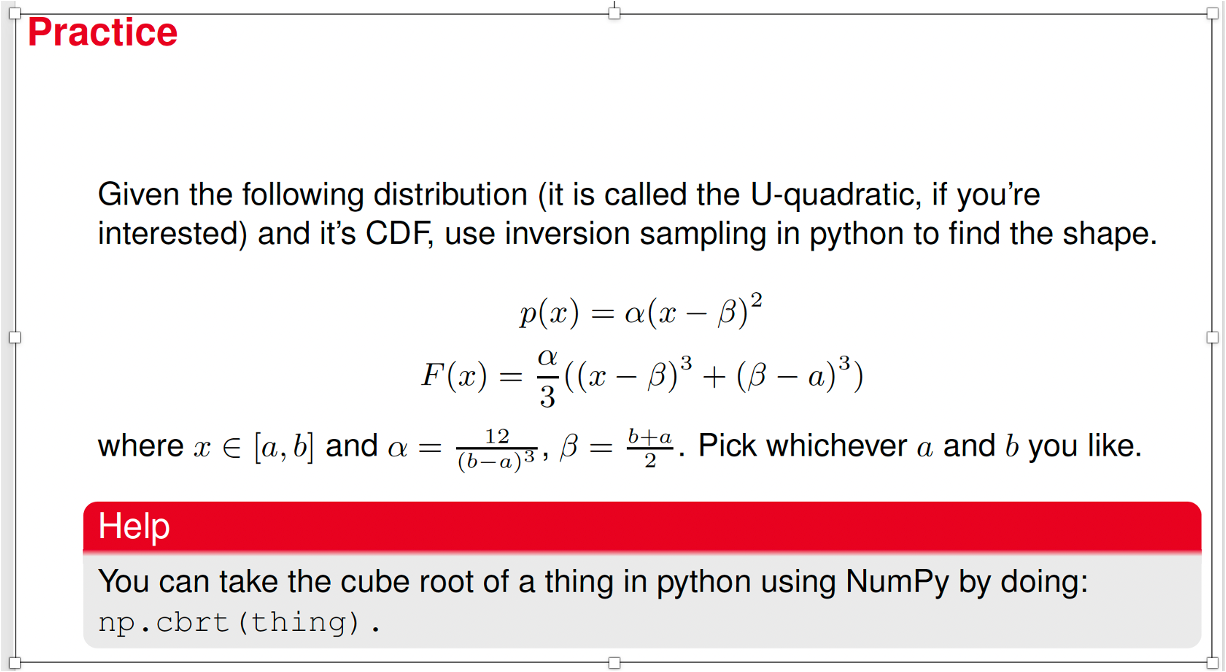

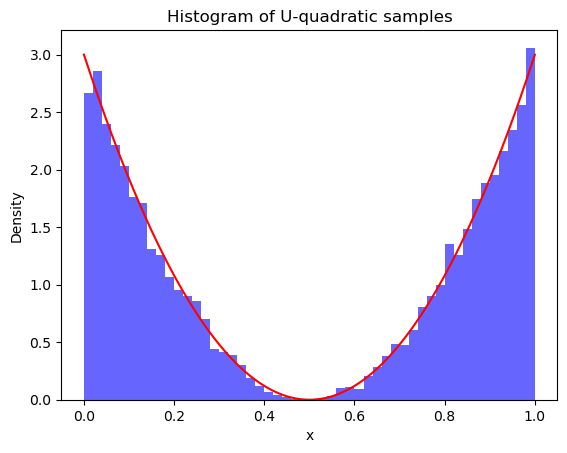

In [7]:


# Define parameters
a, b = 0, 1  # You can choose other values
beta = (b + a) / 2
alpha = 12 / (b - a) ** 3

# Number of samples
n_samples = 10000

# Generate uniform samples
U = np.random.uniform(0, 1, n_samples)

# Inverse CDF transformation
x_samples = beta + np.cbrt((3 * U / alpha) - (beta - a) ** 3)

# Define the original function p(x) = alpha * (x - beta)^2
def p_x(x):
    return alpha * (x - beta) ** 2

# Generate x values and compute p(x)
x_values = np.linspace(a, b, 1000)
p_values = p_x(x_values)

# Plot original function
plt.plot(x_values, p_values, 'r-', label="Original Function p(x)")

# Plot histogram of generated samples
plt.hist(x_samples, bins=50, density=True, alpha=0.6, color='b')
plt.xlabel("x")
plt.ylabel("Density")
plt.title("Histogram of U-quadratic samples")
plt.show()


# Rejection Sampling Example

Target distribution:
$p(x) = e^{-x}$

Proposal distribution:
$q(x) = 1/(b-a)$ over $[0,5]$

Scaling constant M: chosen to ensure that
$Mq(x) > p(x)$

Rejection condition: $u <\frac{p(x)}{Mq(x)}$


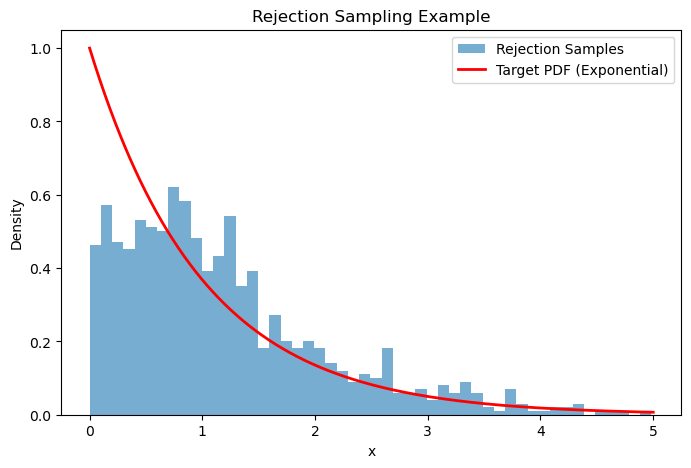

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Target distribution: Exponential PDF (lambda=1)
def target_pdf(x):
    return np.exp(-x)  # Exponential distribution with lambda=1

# Proposal distribution: Uniform PDF from [0, 5]
def proposal_pdf(x, a=0, b=5):
    return 1 / (b - a) if a <= x <= b else 0  # Uniform density function

# Sampling function using rejection sampling
def rejection_sampling(num_samples=10000, M=2, a=0, b=5):
    samples = []
    while len(samples) < num_samples:
        # Sample from proposal distribution
        x = np.random.uniform(a, b)
        u = np.random.uniform(0, 1)  # Sample u from U(0,1)

        # Acceptance condition
        if u < target_pdf(x) / (M * proposal_pdf(x, a, b)):
            samples.append(x)

    return np.array(samples)

# Generate samples
samples = rejection_sampling(num_samples=1000)

# Plot the results
x_vals = np.linspace(0, 5, 1000)
plt.figure(figsize=(8, 5))
plt.hist(samples, bins=50, density=True, alpha=0.6, label="Rejection Samples")
plt.plot(x_vals, target_pdf(x_vals), 'r-', lw=2, label="Target PDF (Exponential)")
plt.legend()
plt.title("Rejection Sampling Example")
plt.xlabel("x")
plt.ylabel("Density")
plt.show()


## An example of using different types of sampling to solve integrals

$$\int_0^1 (x+1)3x^2 dx = \int_0^1 f(x) p(x) dx$$

Where, $f(x) = (x+1)$ and $p(x) = 3x^2$

### Directly Using quad

In [9]:
def f(x):
    return (x+1)

def p(x):
    return 3*x**2

def fp(x):
    return f(x)*p(x)

I, err = quad(fp, 0, 1)
print('Integral using Numpy: %.3f'%I)

Integral using Numpy: 1.750


### Using inversion sampling

Need the inverse CDF. First the CDF of $p(x)$:

$$F(x) = \int_0^x 3x^2 dx = \frac{3x^3}{3} = x^3 = y \Rightarrow F^{-1}(y) = y^{1/3} = x$$

So:

1. Generate uniform samples $y$ from 0 to 1
2. Transform with $F^{-1}$ to $x$
3. Find $\frac{1}{n} \sum_i^n (x_i + 1)$

In [10]:
def inv_CDF(y):
    return y**(1/3)

# First generate 1000 uniform samples
n = 1000
y_samples = np.random.uniform(0, 1, n)

# Use the inverse CDF to convert them
x_samples = inv_CDF(y_samples)

# Calculate the average to estimate the integral
print('Integral Estimated with Inversion Sampling: %.3f'% (x_samples + 1).mean())

Integral Estimated with Inversion Sampling: 1.760


### Using Rejection Sampling

Let's use an exponential distribution to sample from (our $q(x)$). We need to make sure we choose $k$ such that it is entirely above our $p(x)$, and we also need to make sure that our $p(x)$ in python is only defined over the bounds of 0 to 1:

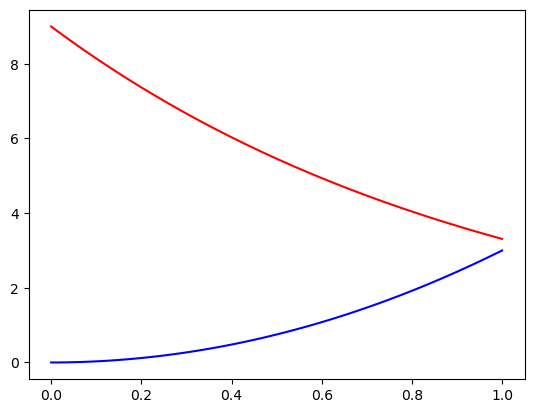

In [11]:
# proposal distribution, exponential with lambda = 1
def q(x):
    return expon_pdf(x, 1)

def p(x):
    try:
        x[x<0] = 0
        x[x>1] = 0
    except:
        if x < 0: return 0
        if x > 1: return 0
    return 3*x**2

# Fiddle with k
k = 9 # this gets the red line entirely above the blue
x = np.linspace(0, 1, 100)
y1 = p(x)
y2 = k*q(x)

plt.plot(x, y1, color = 'blue')
plt.plot(x, y2, color = 'red')
plt.show()

In [12]:
# Define the rejection sampling
def rejection_sampling(n):
    samples = []
    while len(samples) < n:
        v = np.random.exponential(scale=1, size=1).item() # another way to sample from exponential
        if k*q(v)*rand.random() < p(v):
            samples.append(v)

    return samples

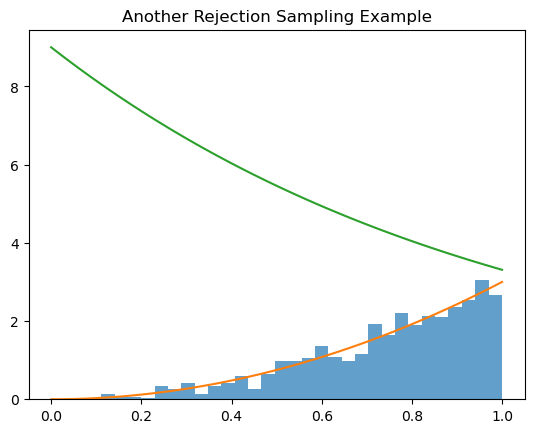

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import random as rand # Import the random module as rand

# proposal distribution, exponential with lambda = 1
def q(x):
    return expon_pdf(x, 1)

def p(x):
    try:
        x[x<0] = 0
        x[x>1] = 0
    except:
        if x < 0: return 0
        if x > 1: return 0
    return 3*x**2

# Fiddle with k
k = 9 # this gets the red line entirely above the blue


# Define the rejection sampling
def rejection_sampling(n):
    samples = []
    while len(samples) < n:
        v = np.random.exponential(scale=1, size=1).item() # another way to sample from exponential
        if k*q(v)*rand.random() < p(v):
            samples.append(v)

    return samples

# Do the sampling and check to make sure samples look good
rej_samples = rejection_sampling(1000)

x = np.linspace(0, 1, 100) # Redefine x for plotting
y1 = p(x)
y2 = k*q(x)

plt.hist(rej_samples, density=True, bins=30, alpha=0.7)
plt.plot(x,y1)
plt.plot(x,y2)
plt.title('Another Rejection Sampling Example')
plt.show()

In [14]:
# Use the samples to estimate the integral
print('Integral Estimated with Rejection Sampling: %.3f'% (np.array(rej_samples) + 1).mean())

Integral Estimated with Rejection Sampling: 1.750


### Using Importance Sampling

Notice that $f(x) = (x + 1)$ and $p(x) = 3x^2$. We want to rewrite the integral such that:

$$\int_0^1 (x + 1)3x^2 dx = \int_0^1 f(x) \frac{p(x)}{q(x)} q(x) dx$$

Where $q(x)$ is something easy to sample from. The easiest thing would be to make $q(x)$ a uniform distribution from 0 to 1 (i.e., $q(x) = 1$):

$$\int_0^1 (x+1)\frac{3x^2}{1} 1 dx \approx \frac{1}{n} \sum_i^n (u_i + 1)3u_i^2$$

Where $u_i \sim Unif(0,1)$:

In [15]:
# generate 1000 samples from a uniform 0 to 1
u = rand.random(1000)

# estimate the mean
print('Integral Estimated with Importance Sampling: %.3f'% ((u + 1)*3*u**2).mean())

Integral Estimated with Importance Sampling: 1.842


## Kernel Density Estimation Sampling

Let's generate data from the KDE of our work hours from last class. Let's get the KDE again:

In [16]:
import pandas as pd
gtky = pd.read_csv('numonly_gtky.csv', header = None, names = ['credit','work'])
gtky.head()

,credit,work
0,17,12
1,17,0
2,17,15
3,16,3
4,16,0


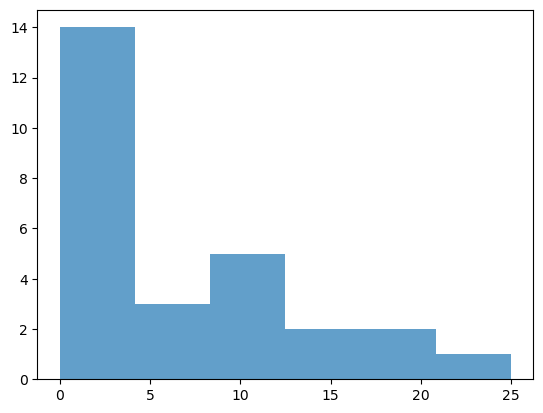

In [17]:
work_hours = np.array(gtky.work)
n, bins, patches = plt.hist(work_hours, 6, alpha=.7)
plt.show()

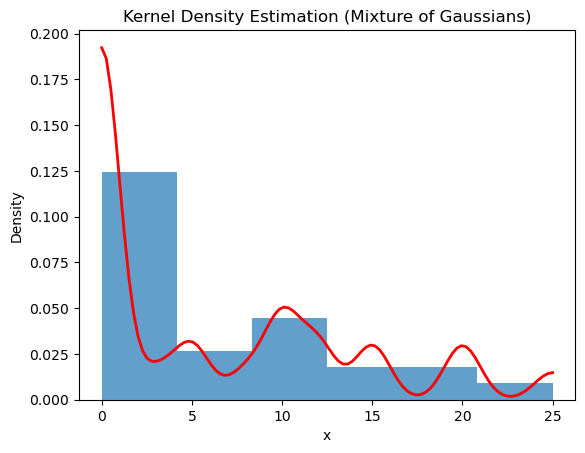

In [18]:
# Pick a sigma (experiment with this; less than 1 probably too granular, try a few larger values)
sigma_kde = 1

# generate x-axis values for KDE plot
x = np.linspace(0, 25, 100)

# compute the KDE values for the mixture of Gaussians
def kde_gauss(x_list, data, sigma_kde):
    n = len(data)
    mixture = 0
    for i in range(n):
        mixture += norm_pdf(x_list, mu=data[i], sigma=sigma_kde)

    return (1/n)*mixture

pdf_kde = kde_gauss(x, work_hours, sigma_kde)

# plot the KDE of the mixture distribution
plt.hist(work_hours, 6, density=True, alpha=.7)
plt.plot(x, pdf_kde, 'r-', linewidth=2)

plt.title('Kernel Density Estimation (Mixture of Gaussians)')
plt.xlabel('x')
plt.ylabel('Density')
plt.show()

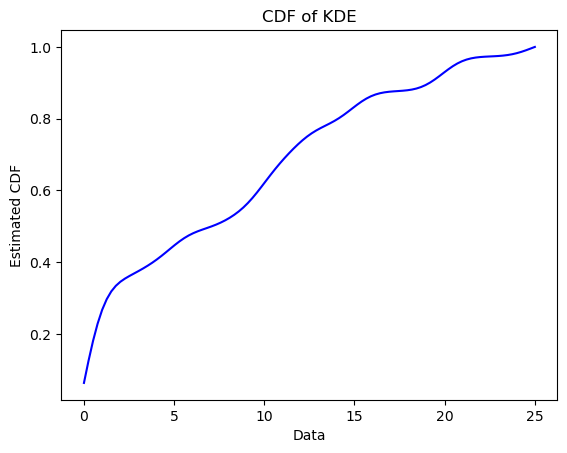

In [19]:
# Estimate the CDF from the KDE

cdf_estimate = np.cumsum(pdf_kde) / np.sum(pdf_kde)

# Plot it to see
plt.plot(x, cdf_estimate, linestyle='-', color = 'blue')
plt.xlabel('Data')
plt.ylabel('Estimated CDF')
plt.title('CDF of KDE')
plt.show()

In [20]:
# Drawing from the "inverse" CDF
# This requires "inputting" a random uniform 0,1 value and getting out an x-value
n = 1000
u = np.random.rand(n)
# This outputs an x for the given u under the CDF
samples = x[np.searchsorted(cdf_estimate, u)]


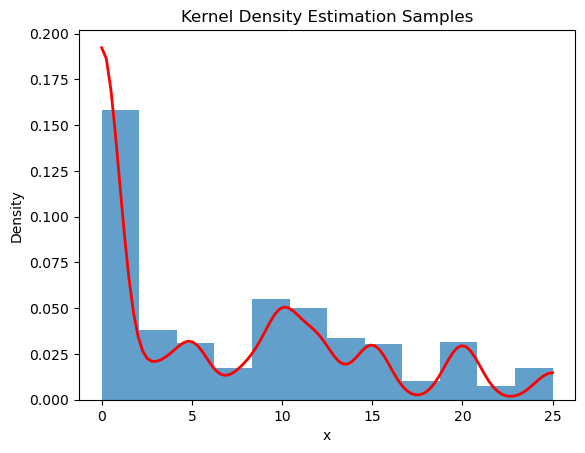

In [21]:
# Compare the kde to the samples
plt.hist(samples, 12, density=True, alpha=.7)
plt.plot(x, pdf_kde, 'r-', linewidth=2)

plt.title('Kernel Density Estimation Samples')
plt.xlabel('x')
plt.ylabel('Density')
plt.show()